In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
real = pd.read_csv("dataset/News_dataset/True.csv")
fake = pd.read_csv("dataset/News_dataset/Fake.csv")


# Marking the real data frame with target as 0 and fake as 1

real['target'] = 0
fake['target'] = 1

# Combining the dataframes

df = pd.concat([real , fake] , axis= 0 )


df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [3]:
# Columns like title , subject ,date are not required 

df.drop(columns=['title', 'subject','date'] , axis=1 , inplace=True)


In [4]:
# Lets do some preprocessing on the text data
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re


lemmatizer = WordNetLemmatizer()


punctuation = string.punctuation

stop_words = stopwords.words("english")


def preprocess_text(text:str):

    text = text.lower()

    text = text.split()

    text = [lemmatizer.lemmatize(word) for word in text if word not in string.punctuation and word not in stop_words]

    text = ' '.join(text)
    text = re.sub(r'https?://\S+|www\.\S+','',text) # Remove the urls 

    return text



df['text'] = df['text'].apply(preprocess_text)

df.head()


,text,target
0,washington (reuters) head conservative republi...,0
1,washington (reuters) transgender people allowe...,0
2,washington (reuters) special counsel investiga...,0
3,washington (reuters) trump campaign adviser ge...,0
4,seattle/washington (reuters) president donald ...,0


In [5]:
# Now we have preprocessed the data
# Defining our X and y 


X = df['text']
y = df['target']


In [6]:

# Lets convert our dataset into vectors


from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

xvectorized = vectorizer.fit_transform(X , y )


In [7]:
# Lets split our data for training and testing
from sklearn.model_selection import train_test_split


x_train , x_test , y_train , y_test = train_test_split(xvectorized , y , test_size=0.3 , random_state=42 , shuffle= True)


print(x_train.shape)
print(y_train.shape)

(31428, 116273)
(31428,)


In [8]:
# Using decision tree for classification
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(x_train ,y_train)


DecisionTreeClassifier()

In [9]:
# Lets evaluate the model

from sklearn.metrics import accuracy_score , classification_report 


y_prediction = dtc.predict(x_test)


print("Accuracy of our model is :-" , accuracy_score(y_prediction , y_test))

print("\n Classification report :- \n\n" , classification_report(y_prediction , y_test))


Accuracy of our model is :- 0.9947290274684484

 Classification report :- 

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      6455
           1       1.00      0.99      0.99      7015

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



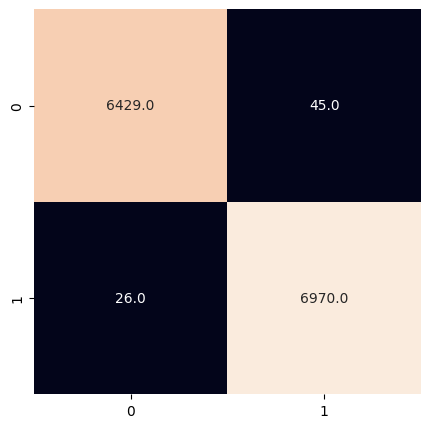

In [10]:
from sklearn.metrics import confusion_matrix


mat = confusion_matrix(y_test , y_prediction)


plt.figure(figsize=[5,5])
sns.heatmap(data=mat , annot=True , cbar=False , fmt=".1f")
plt.show()


In [11]:
# Lets do some prediction on random rows
import random

test_array = x_test.toarray()[:20]

[0. 0. 0. ... 0. 0. 0.]


In [16]:
random_index = random.randint(0 , len(test_array))

random_row = test_array[random_index].reshape(1 , test_array.shape[1])

prediction = dtc.predict(random_row)



if prediction[0] == 0:
    print("The Claim is real !!!")
else:
    print("The Claim is fraudulent !!!")
    

The Claim is fraudulent !!!
